In [1]:
from Regression import Regression
from Franke import FrankeCentered, FrankeCenteredNoise

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
import scipy.stats
import time
from imageio import imread
from tqdm import tqdm, trange

mpl.style.use("seaborn-darkgrid")
mpl.rcParams["image.cmap"] = "gnuplot2"
mpl.rcParams['figure.figsize'] = [6.0, 6.0]

np.random.seed(1942)

# Franke Data

In [ ]:
x, y = np.linspace(-0.5, 0.5, 101), np.linspace(-0.5, 0.5, 101)
reg = Regression()
reg.generate_generic_data(x, y, FrankeCenteredNoise)

In [ ]:
X = reg.get_X(reg.x_flat, reg.y_flat, 5)

df = X.shape[0]*X.shape[1] - 1

XTX_diag = np.diagonal(np.linalg.pinv(X.T@X))

beta = reg.get_beta(X, reg.f_flat)
data_pred = reg.apply_model(beta, reg.x_mesh, reg.y_mesh)
sigma_estimate2 = 1/(X.shape[0] - X.shape[1] - 1)*np.sum((data_pred - reg.f)**2)
sigma_beta = np.sqrt(XTX_diag*sigma_estimate2)
S_beta = np.linalg.pinv(X.T@X)

t_05 = scipy.stats.t.cdf(0.05, df)
beta_cf = np.zeros((len(XTX_diag), 2))
beta_cf[:,0] = beta - t_05*sigma_beta
beta_cf[:,1] = beta + t_05*sigma_beta

In [ ]:
beta_cf

In [ ]:
nr_bootstraps = 1000
nr_parameters = sigma_beta.size
beta_bootstrap = np.zeros((nr_bootstraps, nr_parameters))
for i in range(nr_parameters):
    beta_bootstrap[:,i] = np.random.normal(beta[i], sigma_beta[i], nr_bootstraps)

In [ ]:
franke_bootstraps = np.zeros((nr_bootstraps, 101, 101))
for i in trange(nr_bootstraps):
    franke_bootstraps[i,:,:] = reg.apply_model(beta_bootstrap[i], reg.x_mesh, reg.y_mesh)

In [ ]:
franke_std = np.std(franke_bootstraps, axis=0)

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(franke_std, vmin=0, vmax=0.8, cmap="gnuplot2")
plt.colorbar()
franke_std.min()

In [ ]:
franke_CI95_min = data_pred - t_05*franke_std
franke_CI95_max = data_pred + t_05*franke_std

In [ ]:
plt.imshow(franke_CI95_min, vmin=-0.2, vmax=1.7)
plt.colorbar()

In [ ]:
plt.imshow(franke_CI95_max, vmin=-0.2, vmax=1.7)
plt.colorbar();

# Terrain Data

In [3]:
terrain1 = imread("../input_data/SRTM_data_Norway_1.tif")[::4, ::4]
reg = Regression()
reg.load_matrix_data(terrain1)

In [6]:
X = reg.get_X(reg.x_flat, reg.y_flat, 5)

df = X.shape[0]*X.shape[1] - 1

XTX_diag = np.diagonal(np.linalg.pinv(X.T@X))

beta = reg.get_beta(X, reg.f_flat)
data_pred = reg.apply_model(beta, reg.x_mesh, reg.y_mesh)
sigma_estimate2 = 1/(X.shape[0] - X.shape[1] - 1)*np.sum((data_pred - reg.f)**2)
sigma_beta = np.sqrt(XTX_diag*sigma_estimate2)
S_beta = np.linalg.pinv(X.T@X)

t_05 = scipy.stats.t.cdf(0.05, df)
beta_cf = np.zeros((len(XTX_diag), 2))
beta_cf[:,0] = beta - t_05*sigma_beta
beta_cf[:,1] = beta + t_05*sigma_beta

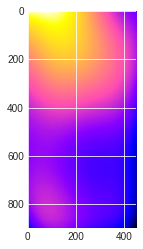

In [9]:
plt.imshow(data_pred)

In [10]:
beta_cf

array([[   649.89237431,    650.82038751],
       [ -1366.66568954,  -1360.47548585],
       [  1810.5582982 ,   1827.12233336],
       [  6823.31603967,   6905.66992505],
       [ -5074.04696775,  -5003.63921411],
       [-14695.04936018, -14415.13673797],
       [  -198.35598564,   -192.17248671],
       [   -40.13441097,    -26.47561034],
       [ -2597.34513885,  -2532.16016637],
       [  3337.53745941,   3398.9257971 ],
       [ -1203.78933425,   -960.42992032],
       [    75.33389591,     91.86178232],
       [  4097.22652605,   4162.34067095],
       [ -1572.06540518,  -1511.84982762],
       [-10866.50971586, -10629.27854887],
       [  1028.46077513,   1110.54680656],
       [ -1490.74593642,  -1429.49217231],
       [  6320.64056172,   6557.61265219],
       [ -2600.839149  ,  -2530.73923167],
       [ -8350.13447033,  -8107.57059936],
       [ -4977.38257199,  -4698.98992685]])

In [11]:
nr_bootstraps = 100
nr_parameters = sigma_beta.size
beta_bootstrap = np.zeros((nr_bootstraps, nr_parameters))
for i in trange(nr_parameters):
    beta_bootstrap[:,i] = np.random.normal(beta[i], sigma_beta[i], nr_bootstraps)

100%|██████████| 21/21 [00:00<00:00, 15204.62it/s]


In [12]:
franke_bootstraps = np.zeros((nr_bootstraps, terrain1.shape[0], terrain1.shape[1]))
for i in trange(nr_bootstraps):
    franke_bootstraps[i,:,:] = reg.apply_model(beta_bootstrap[i], reg.x_mesh, reg.y_mesh)

100%|██████████| 100/100 [00:15<00:00,  6.54it/s]


In [13]:
franke_std = np.std(franke_bootstraps, axis=0)

0.8941400811406215

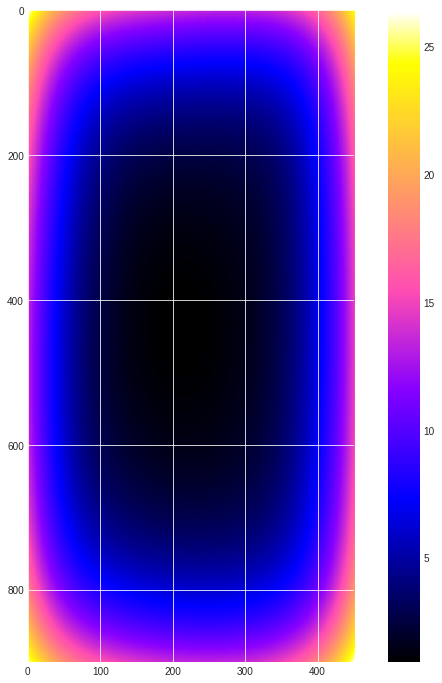

In [14]:
plt.figure(figsize=(12,12))
plt.imshow(franke_std)#, vmin=0, vmax=0.8, cmap="gnuplot2")
plt.colorbar()
franke_std.min()